Only run the following cell once

In [1]:
# Only run this cell once
import os
moduledir = os.path.dirname( os.getcwd() )

os.chdir(moduledir) # Move up one directory so we can import modules

# Equilibrium Values of Voltage

The difficulty with BLG is that its band structure is dependent upon the potential difference between the layers. When measuring a sample of BLG with an STM tip, one typically sweeps over many different values of tip voltage. Thus the act of measuring the band structure changes the band structure itself. In order to account for this, I have developed adapted an electrostatic model from previous works which will determine the equilibrium values of the voltages on the layers of BLG. We can then compute the tunneling current between the BLG and tip

## Defining the Geometry

Below is a diagram defining the variables of the experimental setup.

<img src="../images/CircuitModel.png" />

* $n_{t(b)}$ is the top (bottom) gate carrier density.
* $V_{t(b)}$ is the voltage on the top (bottom) gate.
* $n_{1(2)}$ is the top (bottom) graphene layer carrier density.
* $V_{1(2)}$ is the voltage of the top (bottom) graphene layer.

Capacitances per unit area
* $C_{1(2)}= \epsilon_{1(2)}/d_{1(2)}$ is the capacitance between the top (bottom) gate and top (bottom) gate.
* $C_{BLG}=\epsilon_0/d$ is the capacitance between the two graphene layers, where $d\sim0.3$ nm.

The voltages $V_T$ and $V_G$ bias the tip and the backgate, respectively. We then have a potential drop $V_1$ ($V_2$) from the tip (backgate) to the sample. Now notice that we have defined a potential drop $V_Q$. This is the electrostatic potential drop from the region underneath the tip to ground. Since graphene is a conductor, one may expect that $V_Q=0$. However, since graphene has a finite density of states, it costs energy to promote electrons to states of higher momentum, and therefore the *electrochemical potential* is zero, rather than the electrostatic

$$ \Phi = \epsilon_F + (-|e|)V_Q = 0 \implies \boxed{V_Q = \epsilon_F/|e|}$$ 

From Kirchoff's Law, we see immediately that

$$ V_T = V_1 + V_Q $$
$$ V_G = V_2 + V_Q $$

However, this equation ignores the work functions of the metals. In reality, the difference in work functions induces an extra potential difference between each of the electrodes. The most significant effect is between the tip and the sample, and therefore we should more properly use the equations

$$V_T = V_1 + \Delta W_{t-s} + V_Q \\V_G = V_2 + V_Q$$

where $\Delta W_{t-s}=W_t - W_s$ is the difference in work function between the tip and the sample. For graphene, we estimate $W_s=4.6$ eV ([Zhang et al. 2008](https://www.nature.com/articles/nphys1022)). Notice that we can view this term as a modification to $V_Q$ and it will therefore shift the Fermi level.

## Work Function Notes 8/21/2018
Potential difference $V_1$ should end up being
$$V_1 = (V_T+\Phi_T)-(V_S+\Phi_S)= V_1(old) + \Delta\Phi_{T-S}$$

## Das Sarma Method

In [2]:
from Materials import Graphene

BLG = Graphene.Bilayer()

$$ u-u_{\text{ext}}-\frac{e^2 a_0}{2\epsilon_0}\left(n_t(u)-n_b(u)\right)=0 $$

$$ u-u_{\text{ext}}-\frac{e^2 a_0}{2\epsilon_0}n_-(V_+,V_-)=0 $$

$$ (V_--V_{-\text{ext}})+\frac{e a_0}{4\epsilon_0}n_-(V_+,V_-)=0 $$

Start with $(V_+^0,V_-^0)$. Find new $V_-^1$ from solution to

$$ (V_-^1-V_{-\text{ext}})+\frac{e}{4C_{BLG}}n_-(V_+^0,V_-^1)=0 $$

Amount of charge if it's there

$$ n = \sigma/(-|e|) =\frac{1}{|e|}\left( \frac{V_T\epsilon_1}{d_1} + \frac{V_2\epsilon_2}{d_2} \right) $$

### Fermi Level if no charge

The voltages on the tip and gate will determine the interlayer potential energy difference $u$ and the carrier density $n$ on the sample. Begin by assuming that no charge has accumulated on the graphene. In this case, the graphene causes no change in the electric fields and so the potential at the graphene is determined entirely by $V_T$ and $V_G$. Using simple electrostatics, the displacement field $D$ is a constant

$$D = \frac{\epsilon_1\epsilon_2}{\epsilon_2d_1+\epsilon_1d_2}(V_G-V_T)$$

which implies electric fields $E_1=D/\epsilon_1$ and $E_2=D/\epsilon_2$. This allows us to determine both the potential at the graphene $V_Q$ (and hence the new Fermi level) as well as the interlayer potential. Integrating the electric field from either electrode yields

$$V_+ = \frac{\epsilon_1d_2V_T + \epsilon_2d_1V_B}{ d_1\epsilon_2 + d_2\epsilon_1 }.$$


If $d\sim 3 \mathring A$ is the interlayer distance between the graphene monolayers, then the interlayer potential energy is 

$$ u=u_t - u_b = -|e|\left[ \left(-\frac{d}{2}E_1 \right) - \left(\frac{d}{2}E_2\right) \right] = \frac{|e|d(\epsilon_2+\epsilon_1)}{2(\epsilon_2d_1+\epsilon_1d_2)}(V_G-V_T)$$

or

$$V_- =\frac{d(\epsilon_2+\epsilon_1)}{4(\epsilon_2d_1+\epsilon_1d_2)}(V_T-V_B)$$

### Fermi Level if Charge

Now suppose some charge $n \neq 0$ has accumulated on the graphene so that it partially screens the fields. In this case, it is now the charge density $n$ that determines the Fermi level (and hence $V_Q$). The electric field above (below) the sample is then $E_1=-(V_T-V_1)/d_1$ ($E_2=V_2/d_2$). The graphene forms a parallel plate capacitor with each electrode, so using the usual formula, the total charge density on the graphene will be, to first order,

$$ \sigma = -\left(\frac{(V_T-V_+)\epsilon_1}{d_1} + \frac{(V_B-V_+)\epsilon_2}{d_2} \right) $$

giving a net electron density

$$ n = \sigma/(-|e|) =\frac{1}{|e|}\left( \frac{(V_T-V_+)\epsilon_1}{d_1} + \frac{(V_B-V_+)\epsilon_2}{d_2} \right) $$

The field across $E_{\text{ext}}$ is then the average, and so the first order difference in potential energy between the layers is found to be

$$ u_{\text{ext}} = -|e| d E_{\text{ext}} = |e|\frac{d}{2} \left( \frac{V_B-V_+}{d_2} - \frac{V_T-V_+}{d_1} \right)  $$.

or 

$$V_{-,ext} = \frac{d}{4}(\frac{(V_T-V_+)}{d_1} - \frac{(V_B-V_+)}{d_2}) $$

We can arrive at a self-consistent solution from these equations and Kirchoff's law. We recall the expression for the Fermi energy

$$ \epsilon_F^2 = \frac{(\hbar^2 v_F^2 n \pi)^2 + \gamma_1^2u^2}{4(\gamma_1^2+u^2)} $$

$$ 4\epsilon_F^2\gamma_1^2+(4\epsilon_F^2-\gamma_1^2)u^2 - (\hbar^2 v_F^2\pi)^2n^2 = 0 $$

where $n$ and $u$ are given by the formulae above as functions of $V_1$ and $V_2$ as above and $V_1$ and $V_2$ are related to $\epsilon_F$ via Kirchoff's Law as before. Therefore, the left hand side is only a function of the parameter $\epsilon_F$. To solve this equation for $\epsilon_F$, we will numerically find the root of the left hand side.

## Electrostatic Equations

The carrier densities and voltages obey some simple electrostatic equations (see [Young and Levitov 2011](https://arxiv.org/pdf/1105.1801.pdf)). That is, the displacement field produced between each electrode must be equal to the sum of all other displacement fields.

1. $C_1(V_t - V_1) = \frac{-|e|}{2}(n_t - n_1 - n_2 - n_b)=\frac{e}{2}(n_t-n_b-n_+)$
2. $C_{BLG}(V_2 - V_1) = \frac{-|e|}{2}(n_t + n_1 - n_2 - n_b)=\frac{e}{2}(n_t-n_b+n_-)$
3. $C_2(V_2 - V_b) = \frac{-|e|}{2}(n_t + n_1 + n_2 - n_b)=\frac{e}{2}(n_t-n_b+n_+)$


Lets define $V_\pm = \frac{1}{2}(V_1\pm V_2)$ and $V_\pm^G=\frac{1}{2}(V_t\pm V_b)$. Then combining these three equations leads to

$$ -|e| n_+ = (C_1 + C_2)(V_+ - V_+^G) + (C_1 - C_2)(V_- - V_-^G)$$
$$ -|e|n_- = (C_1 + C_2)(V_- - V_-^G) + (C_1 - C_2)(V_+ - V_+^G) - 4C_{BLG}V_-$$

In order to determine the tunneling current $I$, we must know the equilibrium values of $V_+$ and $V_-$. Note that $n_+$ and $n_-$ are dependent on the band structure of bilayer graphene and therefore highly nonlinear functions of $V_+$ and $V_-$. The trick will be to solve for the values of $V_+$ and $V_-$ that simultaneously satisfy the two above equations.

## Visualization of the Solution

In [1]:
from BLG.BLG_Constants import *
from BLG.BandStructure import *

Below, lets setup an experiment. We set the distances, permittivities, and calculate the capacitances from those values.

In [2]:
d1 = 1*10**-9 # Tip-sample distance
d2 = 305 * 10**-9 # Backgate-Sample distance
d  = 0.3*10**-9 # distance between graphene layers

e0 = 8.85 * 10**-12 # permittivity of free space
e1 = 1*e0 # Vacuum between tip and sample
e2 = 3.9*e0 # SiO2/hBn

# Capacitances
C1 = e1 / d1
C2 = e2 / d2
CBLG = e0 / d

T=0

The right hand sides of our electrostatic equations are planes. We define them here.

In [3]:
def planeplus(vplus, vminus,VGplus,VGminus):
    return (C1 + C2)*(vplus - VGplus) + (C1 - C2)*(vminus - VGminus)

def planeminus(vplus,vminus,VGplus,VGminus):
    return (C1+C2)*( vminus - VGminus ) + (C1 - C2)*( vplus - VGplus) - 4*CBLG*vminus

In [4]:
# Choose tip and backgate voltages
VT = 1
VB = 30

VGplus = (1 / 2) * (VT+VB)
VGminus = (1 / 2) * (VT-VB)

In general, the planes will each intersect the surfaces that describe the carrier densities in 3D lines. We plot them below. They look a little funky because `matplotlib` is not a 3d rendering package.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import Data_Manipulation as dm

In [6]:
vplus = dm.get_vplus(0)
vminus = dm.get_vminus(0)


nplus_array = dm.get_nplus(0)
nminus_array = dm.get_nminus(0)

VP, VM = np.meshgrid(vplus,vminus)

# Get the plane
plane_minus_array = planeminus(vplus, vminus,VGplus,VGminus)
plane_plus_array  = planeplus(vplus,vminus,VGplus,VGminus)

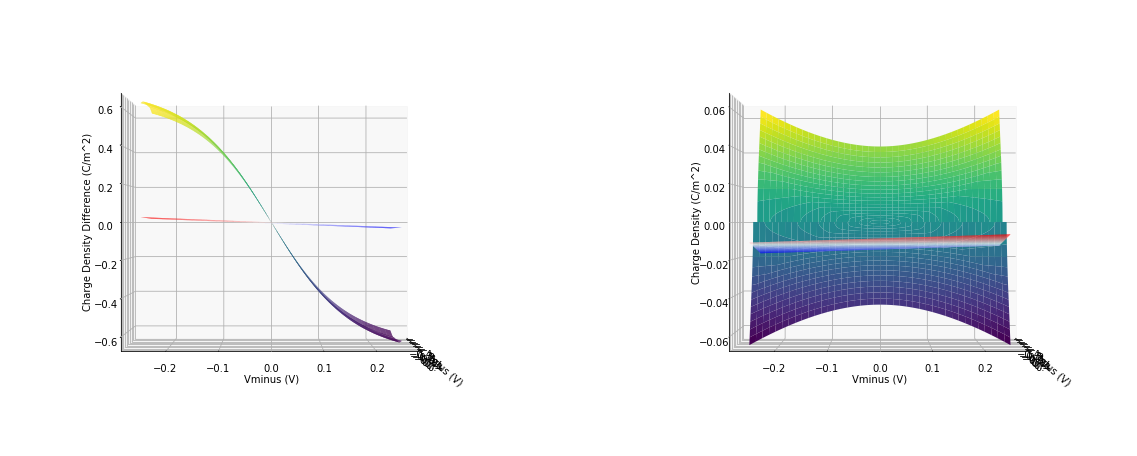

In [7]:
# Plot
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(121,projection='3d')
ax1.plot_surface(VP,VM, -q*nminus_array, rcount=40, ccount=40, 
                cmap='viridis',edgecolor='none')

ax1.plot_surface(VP, VM, plane_minus_array, rcount=40, ccount=40,
                cmap='bwr',edgecolor='none')


ax1.set_ylabel('Vminus (V)')
ax1.set_xlabel('Vplus (V)')
ax1.set_zlabel('Charge Density Difference (C/m^2)')

ax2 = fig.add_subplot(122,projection='3d')
ax2.plot_surface(VP,VM, -q*nplus_array, rcount=40, ccount=40, 
                cmap='viridis',edgecolor='none')

ax2.plot_surface(VP, VM, plane_plus_array, rcount=40, ccount=40,
                cmap='bwr',edgecolor='none')


ax2.set_ylabel('Vminus (V)')
ax2.set_xlabel('Vplus (V)')
ax2.set_zlabel('Charge Density (C/m^2)')


# Set angles
theta = 0
phi = 0
ax1.view_init(theta,phi)
ax2.view_init(theta,phi);

## Self-Consistent Solution

We must find the values $V_+$ and $V_-$ that sit at the intersection of each plane with their respective charge surface. One way of viewing this is that we wish to find $V_+$ and $V_-$ such that the $f_1=f_2=0$ where

$$ f_1(V_+,V_-) = -|e| n_+ - (C_1 + C_2)(V_+ - V_+^G) - (C_1 - C_2)(V_- - V_-^G) = 0$$
$$ f_2(V_+,V_-) = -|e| n_- - (C_1 + C_2)(V_- - V_-^G) - (C_1 - C_2)(V_+ - V_+^G) + 4C_{BLG}V_- = 0$$

Below, we do this using a brute force method. We compute $F^2=f_1^2+f_2^2$ at all values to $V_+$ and $V_-$ and determine where $F$ if minimized using a search over the entire array.

Relevant functions are found in the `Run_Experiment` module.

We set up an experiment with a tip (backgate) located 1 nm (305 nm) away from the sample. The relative permittivities are 1 for the tip-sample region, and 3.9 for the backgate-sample region. The temperature is set to 0 K, and a work function of 5 eV is chosen.

In [13]:
import Run_Experiment as re
from importlib import reload
reload(re)

<module 'Run_Experiment' from 'C:\\Users\\holdm\\Documents\\UW-Madison\\BrarGroup\\Master\\BLGinSTM\\Run_Experiment.py'>

In [14]:
re.setup_experiment(1, 305, 1, 3.9, 0, 5)

Now we generate the tunnel currents and plot the (dI/dV)/(I/V) map.

In [2]:
import numpy as np
import matplotlib.cm as cm

In [11]:
VTmin , VTmax = -0.2, 0.2
num_vts_100 = 2.5 # 250 points

VT = np.linspace(VTmin, VTmax, num=int(num_vts_100*100))

VBmin, VBmax = -45, 45
num_vbs_100 = 2.5 # 250 points

VB = np.linspace(VBmin, VBmax, num=int(num_vbs_100*100))

In [35]:
I = re.generate_tunnelcurrent([VTmin,VTmax], num_vts_100, [VBmin,VBmax], num_vbs_100)

Loading Carrier Densities
Computing equilibrium voltages
0.0\% finished
2.0\% finished
4.0\% finished
6.0\% finished
8.0\% finished
1e+01\% finished
1.2e+01\% finished
1.4e+01\% finished
1.6e+01\% finished
1.8e+01\% finished
2e+01\% finished
2.2e+01\% finished
2.4e+01\% finished
2.6e+01\% finished
2.8e+01\% finished
3e+01\% finished
3.2e+01\% finished
3.4e+01\% finished
3.6e+01\% finished
3.8e+01\% finished
4e+01\% finished
4.2e+01\% finished
4.4e+01\% finished
4.6e+01\% finished
4.8e+01\% finished
5e+01\% finished
5.2e+01\% finished
5.4e+01\% finished
5.6e+01\% finished
5.8e+01\% finished
6e+01\% finished
6.2e+01\% finished
6.4e+01\% finished
6.6e+01\% finished
6.8e+01\% finished
7e+01\% finished
7.2e+01\% finished
7.4e+01\% finished
7.6e+01\% finished
7.8e+01\% finished
8e+01\% finished
8.2e+01\% finished
8.4e+01\% finished
8.6e+01\% finished
8.8e+01\% finished
9e+01\% finished
9.2e+01\% finished
9.4e+01\% finished
9.6e+01\% finished
9.8e+01\% finished
Computing tunnelcurrents
0.0\% 

In [50]:
import os
np.save(os.path.join(os.getcwd(),'temp_current_180618.npy'), I)

In [12]:
import os
I = np.load(os.path.join(os.getcwd(),'temp_current_180618.npy'));

In [13]:
IV = I / VT[:,np.newaxis]

dIdV = np.gradient(I,axis=1)

dIdVnorm = dIdV / IV

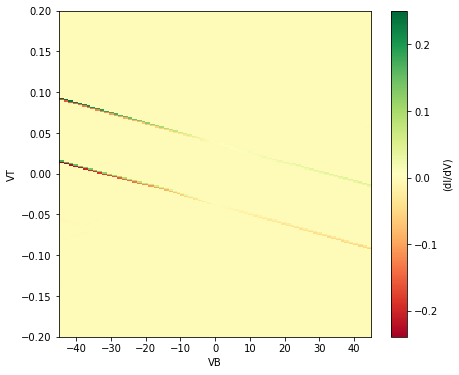

In [14]:
fig, ax = plt.subplots(figsize=(7,6))

ax.set_xlabel('VB')
ax.set_ylabel('VT')

dIdVmap = ax.imshow(dIdVnorm.T[::-1,:], interpolation='none', cmap=cm.RdYlGn,
            origin='lower', aspect='auto',extent = (VBmin,VBmax,VTmin,VTmax))
plt.colorbar(dIdVmap,label="(dI/dV)");